# Семинар по трехмерной геометрии и градиентному спуску

Вопросы для обсуждения в начале семинара:
*  Каким уравнением задается прямая на плоскости? Отличие y = kx + b и ax + by + c = 0
* Записать уравнение плоскости в пространстве, гиперплоскости в многомерном пространстве? 
* В пространстве какой размерности задается гиперплоскость из предыдущего вопроса?
* Если какой-то из коэффициентов равен 0, что это геометрически означает? (можно на примере двумерного случая и обсудить, что в многомерном). 
* Что означает, что свободный член равен 0?

### Визуализация функции от двух переменных

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
%matplotlib inline

In [261]:
def plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=None):
    """
    Визуализирует функцию fun на квадрате [a, b] x [c, d]
    fun : функция, принимающая два аргумента 
         (np.array одинакового размера) и возвращающая
          np.array того же размера со значениями функции
          в соответствующих точках
    Дополнительно возможно нарисовать ломаную линию из N точек,
    лежащую на получившейся поверхности
    trace : np.array размера N x 2 - координаты на плоскости,
            обозначающие точки ломаной
    """
    fig = plt.figure()

    # Make grid
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y = fun(x1, x2)

    # Plot the surface
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y, alpha=0.6)
    ax.contour(x1, x2, y, zdir='z', 
                  offset=y.min(), cmap=cm.coolwarm)
    
    # Plot 3d line 
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y.min(), y.max())

Вам дана функция, визуализирующая поверхности. Ознакомьтесь с ее интерфейсом.

Например, отобразим трехмерную параболу:

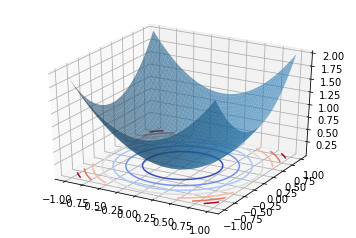

In [268]:
fun = lambda x1, x2: x1**2 + x2**2
plot_3d(fun)

Семинаристам: скорее всего, надо пояснить про lambda-функцию

Круги на плоскости показывают проекции линий уровня поверхности.

Нарисуйте плоскость $y = x_1 + 2 x_2 + 3$:

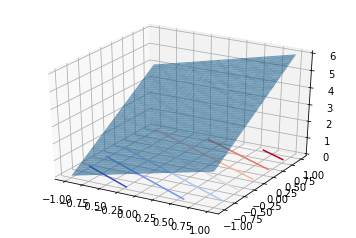

In [263]:
# your code here
fun = lambda x1, x2: x1 + 2*x2 + 3
plot_3d(fun)

Нарисуйте плоскость, параллельную любой из горизонтальных осей:

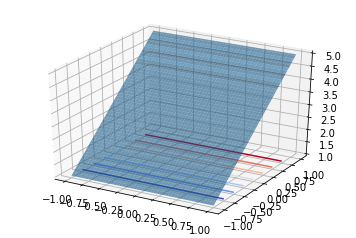

In [264]:
# your code here
fun = lambda x1, x2: 2*x2 + 3
plot_3d(fun)

Нарисуйте плоскость, проходящую через начало координат:

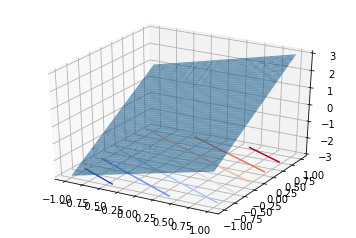

In [265]:
# your code here
fun = lambda x1, x2: 2*x2 + x1
plot_3d(fun)

### Вычисление градиентов функции

Градиент функции $f(x) = f(x_1, \dots, x_d)$ от многих переменных - это вектор ее частных производных.
$$\nabla_x f = \biggl(\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_1} \biggr )$$

Разберем два простых примеры вычисления градиента в случае функции от двух переменных.

__Теоретическая задача 1.__ Найдите градиент линейной функции $f(x) = f(x_1, x_2) = c_1 x_1 + c_2 x_2$ ($c_1$ и $c_2$ - фиксированные числа). 

$$\nabla_x f = (c_1, c_2)$$

Если непонятно, можно взять конкретные коэффициенты, например $c_1 = 3$ и $c_2 = 7$. 

__Теоретическая задача 2.__ Найдите градиент квадратичной функции $f(x) = f(x_1, x_2) = c_1 x_1^2 + c_2 x_2^2$ ($c_1$ и $c_2$ - фиксированные числа). 

$$\nabla_x f = (2 c_1 x_1, 2 c_2 x_2)$$

Если $c1=c2=c$, $\nabla_x f = 2cx$.

Ясно, что минимум такой квадратичной функции достигается в 0.
Наша следующая цель - найти этот минимум с помощью градиентного спуска. 

Воспользуемся кодом квадратичной функции (выше) и обобщим ее на случай любых коэффициентов:

In [269]:
def fun(x1, x2, c1=1, c2=1):
    return c1*x1**2 + c2*x2**2

Для семинаристов: сама функция способна обрабатывать x1 и x2 любой размерности, но градиенты будем считать в предположении, что x1 и x2 - числа (так проще)

Теперь надо реализовать ее градиент. Напишите код функции вычисления градиента в одной точке согласно описанию:

In [279]:
def grad_fun(x1, x2, c1=1, c2=1):
    """
    Функция берет 2 числа, обозначающую точку вычисления градиента,
    и возвращает np.array размера (2,) - градиент квадратичной функции
    Опциональные аргументы: c1 и c2 - коэффициенты
    """
    ### your code here
    return np.array([2*c1*x1, 2*c2*x2])

Проверьте правильность (сверьте с формулой):

In [276]:
grad_fun(x1=0.5, x2=1.5, c1=2, c2=3)

array([ 2.,  9.])

Теперь реализуем градиентны спуск. 
Он работает следующим образом: 
1. сначала инициализируется начальная точка x (это уже сделано)
1. затем повторяются итерации:
$$x = x - \alpha \nabla f x$$
Здесь $\alpha$ - длина шага.

Допишите функцию согласно описанию:

In [283]:
def grad_descend(grad_fun, step_size=0.1, num_steps=20):
    """
    Реализует градиентный спуск
    Аргументы:
    * grad_fun - функция, вычисляющая градиент
    * step_size - длина шага
    * num_steps - число итераций
    
    Возвращает np.array размера (num_steps+1) x 2, 
    (i+1)-й элемент - точка на (i+1)-й итеарации,
    нулевой элемент - случайная инициализация
    """
    x = np.random.rand(2) * 4 - 2
    ### your code here
    trace = np.zeros((num_steps+1, 2))
    trace[0] = x
    for it in range(num_steps):
        grad = grad_fun(x[0], x[1])
        x = x - step_size * grad
        trace[it+1] = x
    return trace

Протестируем функцию (последний элемент должен быть близок к 0):

In [285]:
trace = grad_descend(grad_fun)
trace

array([[ 1.69094087,  1.73999916],
       [ 1.3527527 ,  1.39199933],
       [ 1.08220216,  1.11359946],
       [ 0.86576173,  0.89087957],
       [ 0.69260938,  0.71270365],
       [ 0.5540875 ,  0.57016292],
       [ 0.44327   ,  0.45613034],
       [ 0.354616  ,  0.36490427],
       [ 0.2836928 ,  0.29192342],
       [ 0.22695424,  0.23353873],
       [ 0.18156339,  0.18683099],
       [ 0.14525071,  0.14946479],
       [ 0.11620057,  0.11957183],
       [ 0.09296046,  0.09565747],
       [ 0.07436837,  0.07652597],
       [ 0.05949469,  0.06122078],
       [ 0.04759575,  0.04897662],
       [ 0.0380766 ,  0.0391813 ],
       [ 0.03046128,  0.03134504],
       [ 0.02436903,  0.02507603],
       [ 0.01949522,  0.02006082]])

Теперь мы готовы визуализировать градиентный спуск. Для этого передайте нашу траекторию оптимизации в качестве последнего аргумента функции plot_3d.

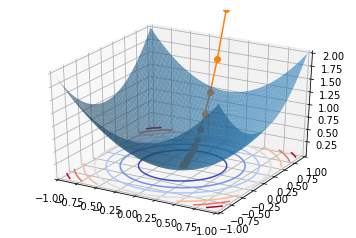

In [288]:
### your code here
trace = grad_descend(grad_fun, 0.1, 30)
plot_3d(fun, trace=trace)

Может потребоваться запустить ячейку пару раз, чтобы траекторию было лучше видно.

Запустите оптимизацию несколько раз, чтобы посмотреть, как ведет себя процесс в зависимости от начального приближения:

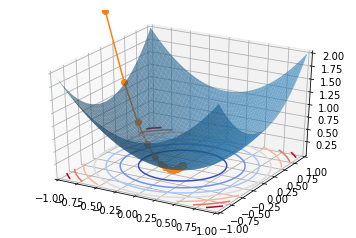

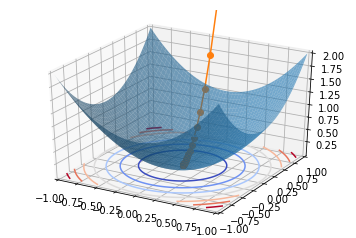

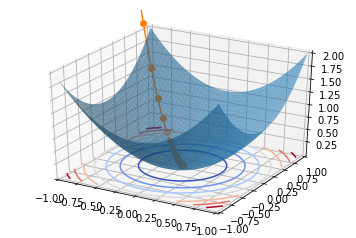

In [291]:
### your code here
for i in range(3):
    trace = grad_descend(grad_fun, 0.1, 30)
    plot_3d(fun, trace=trace)

Попробуйте разную длину шага (0.01, 0.1, 0.5, 1). Рекомендуется перед запуском градиентного спуска написать np.random.seed(<число>), чтобы все запуски были из одного начального приближения.

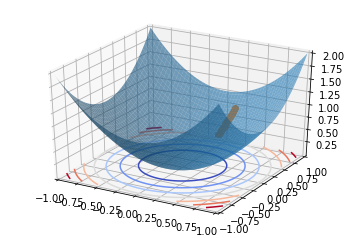

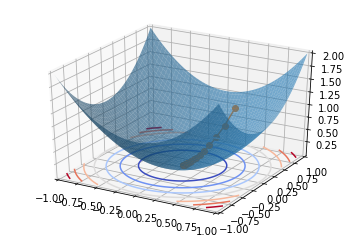

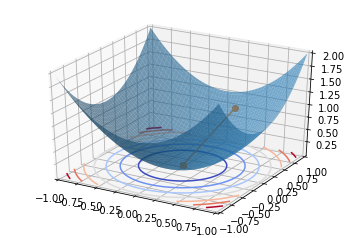

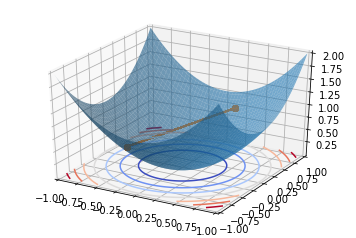

In [297]:
### your code here
for ss in [0.01, 0.1, 0.5, 1]:
    np.random.seed(0)
    trace = grad_descend(grad_fun, step_size=ss)
    plot_3d(fun, trace=trace)

При маленькой длине шага процесс идет сишком медленно, при большой - может разойтись.

Наконец, попробуем использовать другие коэффициенты. Оптимизируйте функцию $f(x) = x_1^2 + 5 x_2^2$, пробуя длину шага (0.1, 0.2, 0.5):

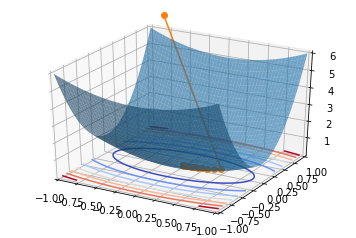

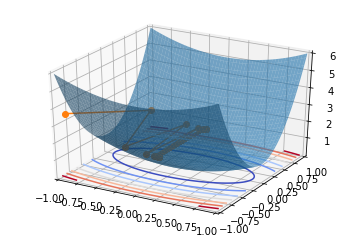

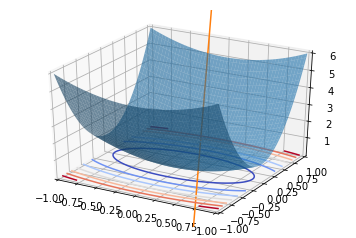

In [315]:
### your code here
fun_c = lambda x1, x2: fun(x1, x2, 1, 5)
grad_fun_c = lambda x1, x2: grad_fun(x1, x2, 1, 5)
for ss in [0.1, 0.2, 0.5]:
    trace = grad_descend(grad_fun_c, step_size=ss)
    plot_3d(fun_c, trace=trace)

"Вытянутую" функцию сложнее оптимизировать. Именно поэтмоу данные рекомендуется нормировать перед обучением модели, чтобы избежать таких колебаний при оптимизации.